In [1]:
import numpy as np
import pandas as pd

import warnings 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
#import scikitplot as skplt

from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()



In [85]:

#import dataset and separate columns at ;
df1 = pd.read_csv('Hotel-A-train.csv')
validate = pd.read_csv('Hotel-A-validation.csv')
test = pd.read_csv('Hotel-A-test.csv')

In [86]:
#check for null values
df1.isnull().sum() 

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [87]:
df1['Reservation_Status'].value_counts(normalize=True)*100

Check-In    77.239172
Canceled    15.033274
No-Show      7.727554
Name: Reservation_Status, dtype: float64

In [88]:
#change date to string and then to ordinal

#training data

df1['Booking_date']= pd.to_datetime(df1['Booking_date']).apply(lambda x: x.toordinal())
df1['Expected_checkin']= pd.to_datetime(df1['Expected_checkin']).apply(lambda x: x.toordinal())
df1['Expected_checkout']= pd.to_datetime(df1['Expected_checkout']).apply(lambda x: x.toordinal())


In [89]:
#validate

validate['Booking_date']= pd.to_datetime(validate['Booking_date']).apply(lambda x: x.toordinal())
validate['Expected_checkin']= pd.to_datetime(validate['Expected_checkin']).apply(lambda x: x.toordinal())
validate['Expected_checkout']= pd.to_datetime(validate['Expected_checkout']).apply(lambda x: x.toordinal())

In [90]:
#testing data

test['Booking_date']= pd.to_datetime(test['Booking_date']).apply(lambda x: x.toordinal())
test['Expected_checkin']= pd.to_datetime(test['Expected_checkin']).apply(lambda x: x.toordinal())
test['Expected_checkout']= pd.to_datetime(test['Expected_checkout']).apply(lambda x: x.toordinal())


In [91]:
#give values for categorical data
#validate and  train datasets



for x in [df1,validate]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Reservation_Status'] = labelenc.fit_transform(x.Reservation_Status)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    
    

In [92]:
#test dataset

for x in [test]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    
    

In [93]:
X=  df1.drop(['Reservation_Status'], axis=1)
Y = df1['Reservation_Status']

In [94]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [95]:

X_test = test

In [96]:

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.30)

In [97]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_jobs=-1)
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [98]:
y_pred = RFclassifier.predict(X_val)

Accuracy is:  0.7698181818181818


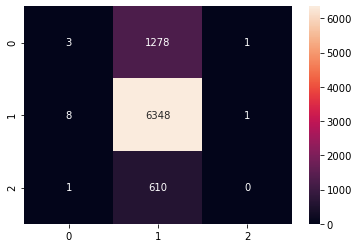

In [99]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_val,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
print(confusion_matrix(y_val, y_pred))

[[   3 1278    1]
 [   8 6348    1]
 [   1  610    0]]


In [102]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1282
           1       0.77      1.00      0.87      6357
           2       0.00      0.00      0.00       611

    accuracy                           0.77      8250
   macro avg       0.34      0.33      0.29      8250
weighted avg       0.63      0.77      0.67      8250



In [103]:
y_pred_test=RFclassifier.predict(X_test)

In [104]:
y_pred_test.shape

(4318,)

In [105]:
df1.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)
test.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)

In [23]:
output = pd.DataFrame({'Reservation-id':test.Reservation_id.astype(np.int32), 'Reservation_Status':y_pred_test})
output.to_csv('my_submissionnew.csv', index=False)

### Feature selection

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df1)
plt.xticks(rotation=90)

ValueError: Could not interpret input 'features'

<Figure size 720x720 with 0 Axes>

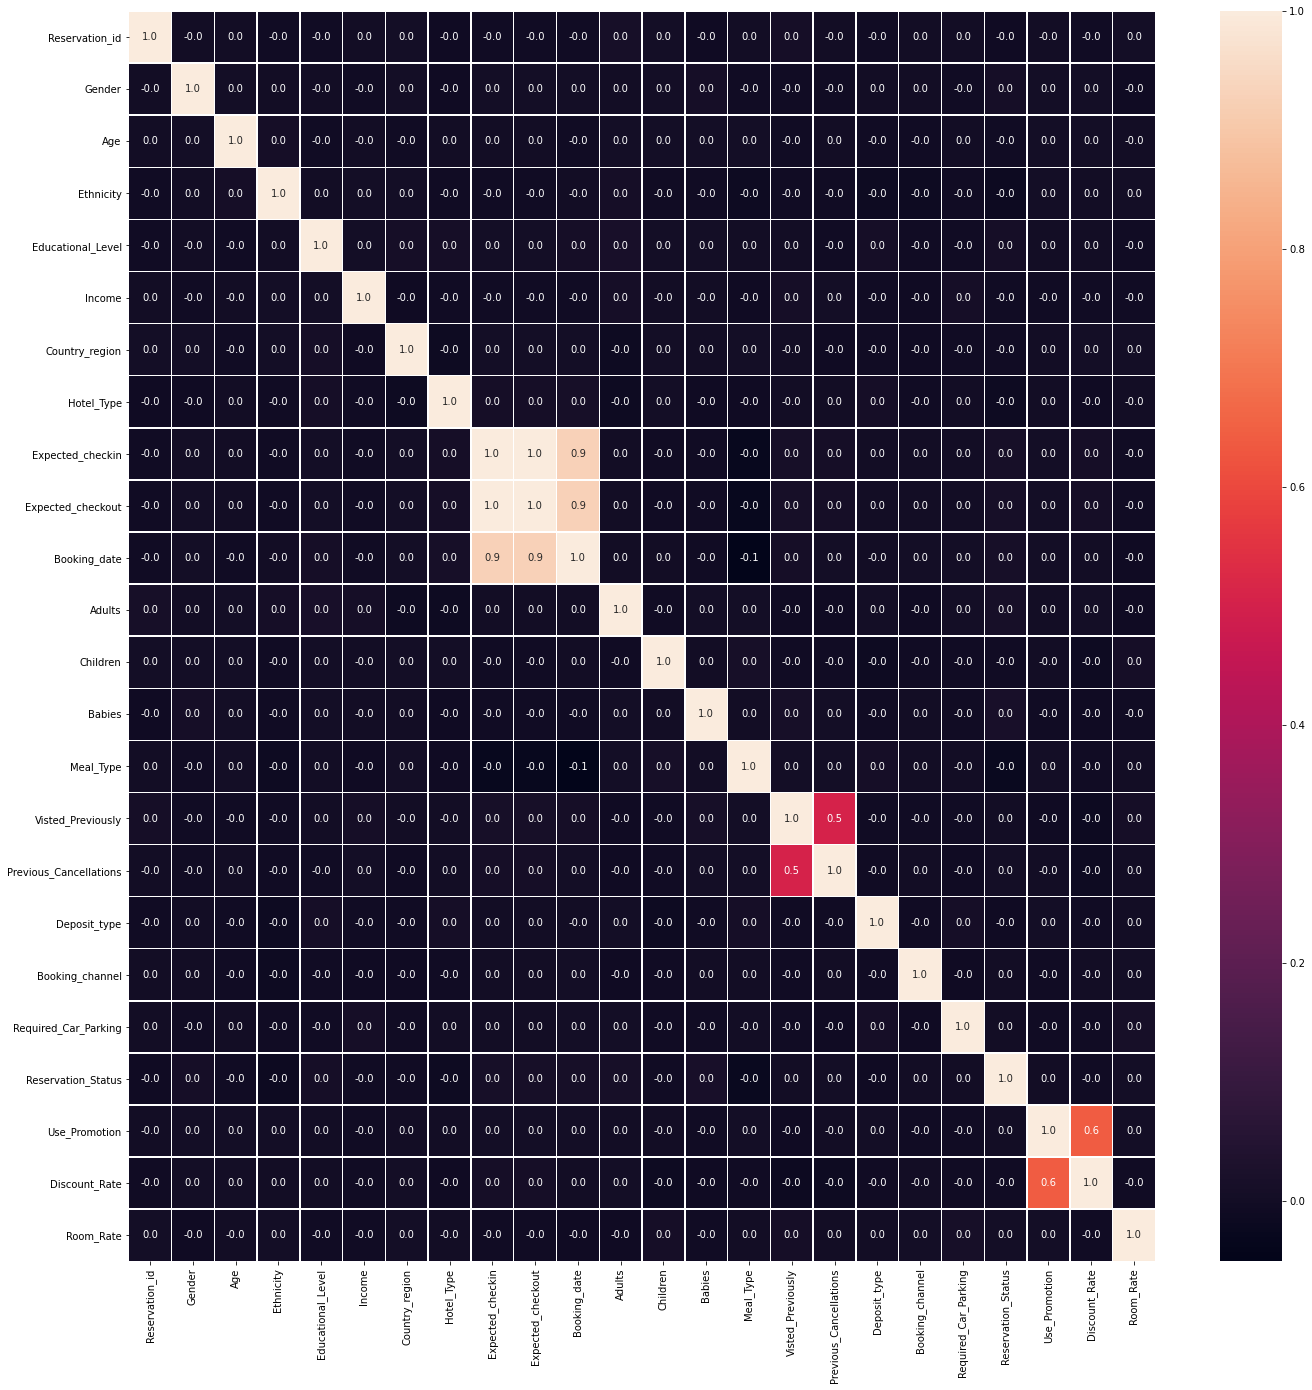

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(23, 23))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [42]:

from sklearn.model_selection import cross_val_score

#clf = RandomForestClassifier(n_estimators = 50, max_depth = 4)

scores = []
num_features = len(X.columns)
for i in range(num_features):
    col = X.columns[i]
    score = np.mean(cross_val_score(RFclassifier, X[col].values.reshape(-1,1), Y, cv=10))
    scores.append((int(score*100), col))

print(sorted(scores, reverse = True))

[(77, 'Visted_Previously'), (77, 'Use_Promotion'), (77, 'Room_Rate'), (77, 'Required_Car_Parking'), (77, 'Previous_Cancellations'), (77, 'Meal_Type'), (77, 'Income'), (77, 'Hotel_Type'), (77, 'Gender'), (77, 'Ethnicity'), (77, 'Educational_Level'), (77, 'Discount_Rate'), (77, 'Deposit_type'), (77, 'Country_region'), (77, 'Children'), (77, 'Booking_channel'), (77, 'Babies'), (77, 'Age'), (77, 'Adults'), (75, 'Booking_date'), (72, 'Expected_checkout'), (69, 'Expected_checkin'), (62, 'Reservation-id')]


In [43]:
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 10 best features selected by this method are :")
    for i in range(10):
        print(scores[i][1])
    
    print ("The 7 worst features selected by this method are :")
    for i in range(7):
        print(scores[len(scores)-1-i][1])

In [45]:
print_best_worst(scores)

The 10 best features selected by this method are :
Visted_Previously
Use_Promotion
Room_Rate
Required_Car_Parking
Previous_Cancellations
Meal_Type
Income
Hotel_Type
Gender
Ethnicity
The 7 worst features selected by this method are :
Reservation-id
Expected_checkin
Expected_checkout
Booking_date
Adults
Age
Babies


In [106]:
df1

,Reservation_id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,0,40,2,1,2,1,1,735780,735781,...,0,0,0,0,2,1,1,1,10,218
1,77491756,0,49,2,3,1,0,1,735780,735781,...,0,0,0,2,2,1,1,0,0,185
2,73747291,0,42,3,1,2,0,1,735781,735785,...,0,0,0,0,2,1,1,0,0,119
3,67301739,1,25,0,0,3,2,0,735781,735782,...,0,0,0,2,0,1,1,1,5,144
4,77222321,0,62,2,2,0,0,2,735782,735783,...,0,0,0,0,1,0,1,1,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,0,3,2,3,1,736207,736208,...,2,1,1,0,2,1,1,1,10,100
27495,56414525,0,49,1,0,0,2,0,736207,736208,...,0,0,0,2,0,1,2,1,40,194
27496,52023375,0,49,2,2,1,2,0,736208,736209,...,2,0,0,0,1,1,1,1,5,202
27497,98041387,1,65,0,0,0,2,0,736207,736208,...,1,0,0,0,2,0,0,1,20,157


In [77]:
#drop columns with low score
##after doing filter based feature selection in Azure Machine Learning Studio, the highest 7 features were selected
#drop columns that aren't required

#df2 = df1.drop([ 'Reservation_id', 'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults', 'Age', 'Babies'], axis='columns', inplace=True)

In [81]:
#df2

In [107]:
drop_list1 = [ 'Reservation_id', 'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults', 'Age', 'Babies']

In [108]:
x_1 = df1.drop(drop_list1,axis = 1 ) 

In [123]:
drop_list2 = [ 'Reservation-id', 'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults', 'Age', 'Babies']

In [125]:
x2 =  validate.drop(drop_list2,axis = 1 ) 

In [127]:
y2 = validate['Reservation_Status']

In [110]:
x_1.head()

,Gender,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Children,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,0,2,1,2,1,1,2,0,0,0,0,2,1,1,1,10,218
1,0,2,3,1,0,1,3,0,0,0,2,2,1,1,0,0,185
2,0,3,1,2,0,1,3,0,0,0,0,2,1,1,0,0,119
3,1,0,0,3,2,0,3,0,0,0,2,0,1,1,1,5,144
4,0,2,2,0,0,2,1,0,0,0,0,1,0,1,1,10,242


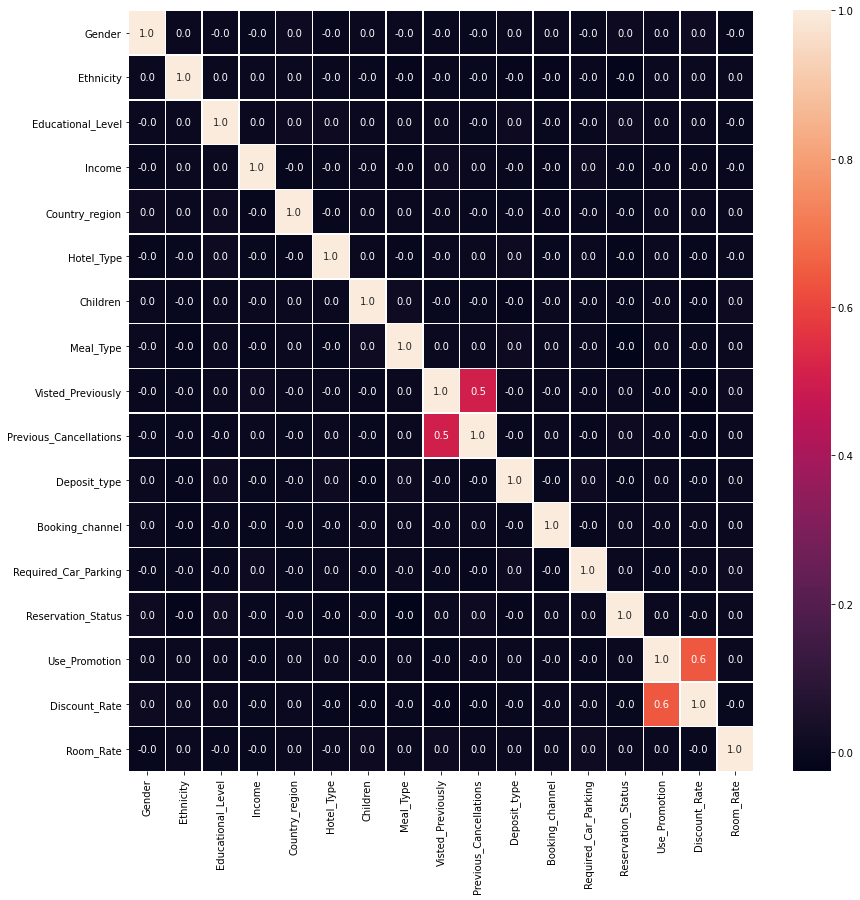

In [111]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

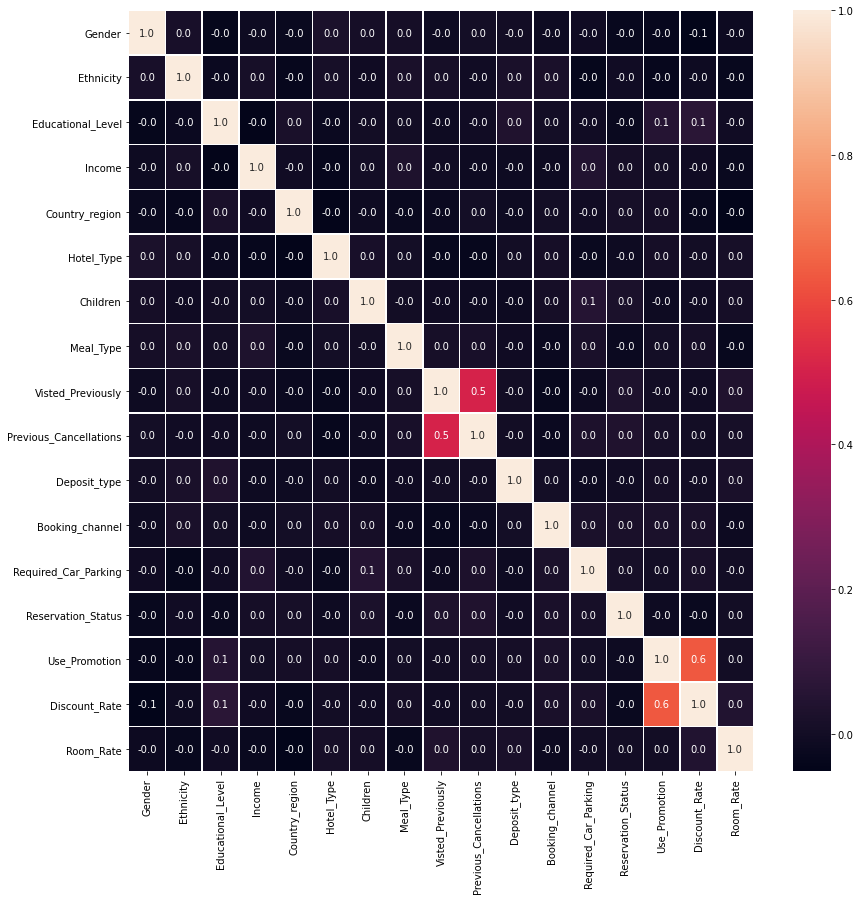

In [128]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [137]:
#test accuracy of new one
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.4, random_state=45)

Accuracy is:  1.0


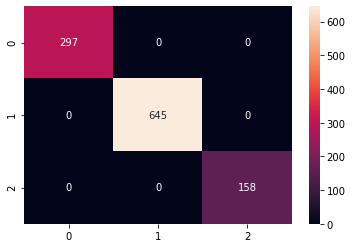

In [138]:
clf_rf = RandomForestClassifier(n_jobs=-1)      
clr_rf = clf_rf.fit(x_train,y_train)
y_predv =clf_rf.predict(x_test)



acv = accuracy_score(y_test,y_predv)
print('Accuracy is: ',acv)
cmv = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cmv,annot=True,fmt="d")

In [120]:
#test accuracy of new one
x_train, x_test, y_train, y_test = train_test_split(x_1, Y, test_size=0.3, random_state=6)

Accuracy is:  1.0


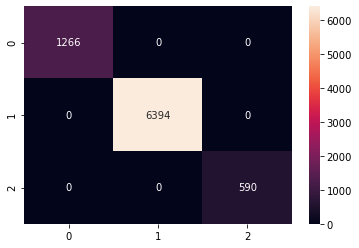

In [121]:
clf_rf = RandomForestClassifier(n_jobs=-1)      
clr_rf = clf_rf.fit(x_train,y_train)
y_pred1 =clf_rf.predict(x_test)



ac1 = accuracy_score(y_test,y_pred1)
print('Accuracy is: ',ac1)
cm1 = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm1,annot=True,fmt="d")

In [118]:
print(confusion_matrix(y_test, y_pred1))

[[1259    0    0]
 [   0 6381    0]
 [   0    0  610]]


In [119]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      6381
           2       1.00      1.00      1.00       610

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250

